In [44]:
import h5py
import scipy.io as io
import scipy.spatial
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [45]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [46]:
#set the root to the Shanghai dataset you download
root = 'C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset'

In [47]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [48]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [49]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_100.jpg
(654, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_103.jpg
(400, 400)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_104.jpg
(405, 540)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/datase

done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_154.jpg
(416, 624)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_155.jpg
(409, 620)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_156.jpg
(625, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_157.jpg
(450, 299)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_158.jpg
(671, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_159.jpg
(267, 400)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_16.jpg
(1024, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master

done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_209.jpg
(619, 1000)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_21.jpg
(766, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_210.jpg
(768, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_211.jpg
(334, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_212.jpg
(688, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_213.jpg
(749, 1000)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_214.jpg
(359, 329)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-mast

done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_264.jpg
(576, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_265.jpg
(464, 370)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_266.jpg
(391, 630)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_267.jpg
(521, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_268.jpg
(600, 900)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_269.jpg
(400, 600)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_27.jpg
(572, 945)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/d

done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_49.jpg
(681, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_5.jpg
(683, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_50.jpg
(985, 985)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_51.jpg
(656, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_52.jpg
(768, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_53.jpg
(662, 962)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/train_data\images\IMG_54.jpg
(564, 832)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/datase

done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_103.jpg
(666, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_104.jpg
(683, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_105.jpg
(661, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_106.jpg
(476, 1001)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_107.jpg
(463, 691)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_108.jpg
(552, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_109.jpg
(683, 1024)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dat

done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_159.jpg
(580, 882)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_16.jpg
(419, 536)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_160.jpg
(359, 478)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_161.jpg
(540, 960)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_162.jpg
(448, 610)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_163.jpg
(500, 649)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_164.jpg
(265, 701)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\pa

done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_50.jpg
(1024, 992)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_51.jpg
(667, 1000)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_52.jpg
(284, 550)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_53.jpg
(369, 553)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_54.jpg
(350, 725)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_55.jpg
(630, 934)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A_final/test_data\images\IMG_56.jpg
(411, 620)
generate density...
done.
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_A

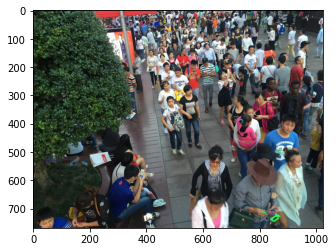

In [61]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

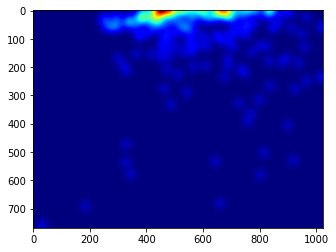

In [62]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [63]:
np.sum(groundtruth)# don't mind this slight variation

233.99999999999994

In [58]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [59]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [60]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_1.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_10.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_100.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_101.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_102.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_103.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_104.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_105.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_106.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_107.jpg
C:/Users/wzdmr/Workspac

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_175.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_176.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_177.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_178.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_179.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_18.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_180.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_181.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_182.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_183.jpg
C:/Users/wzdmr/Worksp

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_252.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_253.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_254.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_255.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_256.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_257.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_258.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_259.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_26.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_260.jpg
C:/Users/wzdmr/Worksp

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_328.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_329.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_33.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_330.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_331.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_332.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_333.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_334.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_335.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_336.jpg
C:/Users/wzdmr/Worksp

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_44.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_45.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_46.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_47.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_48.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_49.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_5.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_50.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_51.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/train_data\images\IMG_52.jpg
C:/Users/wzdmr/Workspace/CSRNet

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_122.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_123.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_124.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_125.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_126.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_127.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_128.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_129.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_13.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_130.jpg
C:/Users/wzdmr/Workspace/CSRNet

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_2.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_20.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_200.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_201.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_202.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_203.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_204.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_205.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_206.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_207.jpg
C:/Users/wzdmr/Workspace/CSRNet-p

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_275.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_276.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_277.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_278.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_279.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_28.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_280.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_281.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_282.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_283.jpg
C:/Users/wzdmr/Workspace/CSRNet

C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_67.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_68.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_69.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_7.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_70.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_71.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_72.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_73.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_74.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-master/dataset\part_B_final/test_data\images\IMG_75.jpg
C:/Users/wzdmr/Workspace/CSRNet-pytorch-m